In [1]:
import sympy as smp
from sympy.abc import lamda, nu, mu, i, s
smp.init_printing(use_unicode=True, use_latex=True)

zeta_sum = smp.Sum(1/nu**s, (nu, 1, smp.oo))
[zeta_sum.subs({s:k}).evalf() for k in range(2,10)]

<h1>CONDITIONAL EXTREMUM</h1>

<b>Problem 18</b>

10*lamda*x + mu + 2*x 10*lamda*y + 2*mu + 2*y -2*lamda*z + 3*mu + 2*z 5*x**2 + 5*y**2 - z**2 x + 2*y + 3*z - 20


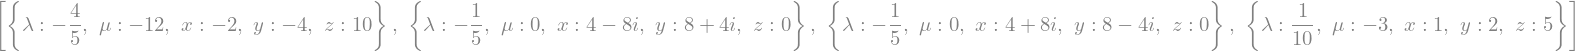

In [2]:
x, y, z, mu, lamda = smp.symbols('x y z mu lamda')
f, g, h = smp.symbols('f g h', cls=smp.Function)
f = x**2 + y**2 + z**2
g = 5*x**2 + 5*y**2 - z**2
h = x + 2*y + 3*z - 20

f_grad = smp.Matrix([f.diff(x), f.diff(y), f.diff(z)])
g_grad = smp.Matrix([g.diff(x), g.diff(y), g.diff(z)])
h_grad = smp.Matrix([h.diff(x), h.diff(y), h.diff(z)])
eq = f_grad + lamda*g_grad + mu*h_grad
print(eq[0], eq[1], eq[2], g, h)

sln = smp.solve([eq, g, h])
sln

<b>Problem 22</b>

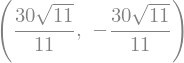

In [3]:
X = smp.symbols('x1:11')
lamda = smp.symbols('lamda')
f, g = smp.symbols('f g', cls=smp.Function)

f = sum(X)
g = 0
for i in range(10):
    for j in range(i, 10):
        g += X[i]*X[j]

g = g - 45
f_grad = smp.Matrix([f.diff(X[i]) for i in range(10)])
g_grad = smp.Matrix([g.diff(X[i]) for i in range(10)])

eq = f_grad + lamda*g_grad

sln = smp.solve([*eq, g])
sln

extr_point1, extr_point2 = sln[0], sln[1]
del extr_point1[lamda]
del extr_point2[lamda]

#   VALUES AT EXTREMAS
f.subs(extr_point1), f.subs(extr_point2)



INTEGRAL

In [4]:
smp.simplify(smp.Integral(smp.cbrt(1+x**2), (x, 0, 100))).doit().evalf()

In [5]:
#SUBSETS
list(smp.subsets(['a', 'b', 'c']))

[(),
 ('a',),
 ('b',),
 ('c',),
 ('a', 'b'),
 ('a', 'c'),
 ('b', 'c'),
 ('a', 'b', 'c')]

<h1>LAMBDIFY</h1>

In [6]:
x, t = smp.symbols('x t')
int_exp = smp.integrate(smp.exp(t), (t, 0, x))

f = smp.lambdify([x], int_exp)
f, f(1), f(10), int_exp

(<function _lambdifygenerated(x)>,
 1.718281828459045,
 22025.465794806718,
 exp(x) - 1)

<h1>Limit, sequences</h1>
Problem 91

In [7]:
from sympy import sequence
from sympy.abc import n, L

squares = sequence(n**2, (n, 0, smp.oo))
print(type(squares))
print(squares.gen,squares.length,squares.start,squares.stop,squares.variables)

squares.find_linear_recurrence(n=100,)

# one_to_three = sequence((1,3,5,4))
# one_to_three.coeff(2)
# print(one_to_three.gen,one_to_three.length,one_to_three.start,one_to_three.stop,one_to_three.variables)



# sum_sq = smp.Sum(squares.coeff(j), (j, 0, 10))
# sum_sq

# a = smp.symbols('a')
# L = smp.Limit(smp.Indexed('a',n), n, smp.oo)
# mean = 1/n*smp.Sum(smp.Indexed('a',j), (j, 1, n)).doit()
# L_mean = smp.Limit(mean, n, smp.oo)

# (L - L_mean)

# difference = mean - smp.Indexed('a',n)
# difference.doit()
# smp.Limit(difference, n, smp.oo).doit()


<class 'sympy.series.sequences.SeqFormula'>
n**2 oo 0 oo (n,)


Power tower simulation

<class 'function'>


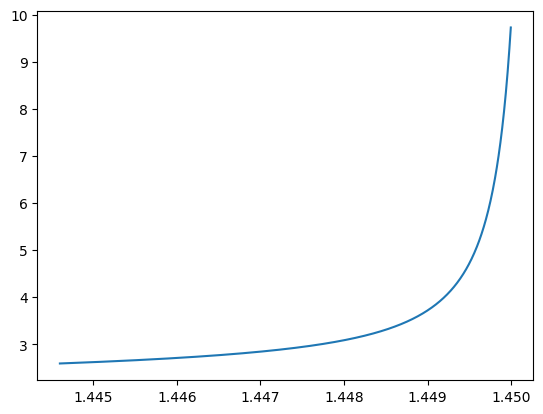

In [8]:
tower = smp.Function('f')
tower = x**y
for i in range(40):
    tower = tower.subs({y:x**y})
tower = tower.subs({y:1})

tower_f = smp.lambdify(x, tower, 'numpy')
print(type(tower_f))

a, b, N = 1.4446, 1.45, 1000
X = [a+i*(b-a)/N for i in range (N)]
f_sample = [tower_f(t) for t in X]

import matplotlib.pyplot as plt
plt.plot(X, f_sample)

In [9]:
f = smp.symbols('f', cls=smp.Function)
f = x**x
for i in range(3):
    f = f.subs({x:x**x})
f, smp.powdenest(f, force=True), smp.powdenest(f, force=True).simplify()
smp.powdenest(f, force=True).simplify()

<h1>Rewrite</h1>

In [10]:
print(smp.latex(smp.tan(x).rewrite(smp.cos)))

\frac{\cos{\left(x - \frac{\pi}{2} \right)}}{\cos{\left(x \right)}}


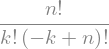

In [11]:
smp.binomial('n', 'k').rewrite(smp.factorial)

In [12]:
x = smp.symbols('x')

smp.integrate( x/smp.sqrt(x**4+10*x**2-96*x-71), x)
smp.integrate((x**2+2*x+1+(3*x+1)*smp.sqrt(x+smp.ln(x)))/(x*smp.sqrt(x+smp.ln(x))*(x+smp.sqrt(x+smp.ln(x)))))
smp.Integral(smp.sin(x**2), x).doit()

smp.sin(x).integrate(x)

Limit((x + y)/(x**2 + y**2), x, 0, dir='+-')


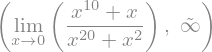

In [13]:
y = smp.symbols('y')
limit_expr = smp.Limit((x+y)/(x**2+y**2), x, 0, '+-')#.doit()
print(limit_expr)

limit_expr = limit_expr.subs(y, x**10)
limit_expr, limit_expr.doit()

<h1>ROOTS</h1>

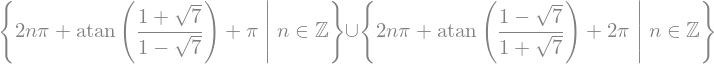

In [14]:
import sympy as smp
x, y = smp.symbols('x y')

smp.solve((x-1)**2, x, dict=True)

smp.solve(smp.sin(x), x, dict=True)
smp.solveset(smp.sin(x),x)

smp.solveset(x**2 - y, x, domain=smp.S.Reals) # returns sympy Set object
smp.solve(x**2 - y, x, dict=True) # returns dictionary, which can be substituted

smp.solveset(smp.sin(x) + smp.cos(x) - smp.Rational(1,2), x)

<h1>LIMIT</h1>

In [15]:
from sympy import *
x = symbols('x')
Limit((atan(x)*sinh(2*x)-2*x)/((1-tan(x))**(x/2)-(1-2*x)**(1/4)), x, 0).doit()

<h1>Riccati DE</h1>

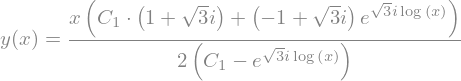

In [16]:
x = symbols('x')
y = symbols('y', cls=Function)
y=y(x)
dsolve(x**2*y.diff(x)-y**2-x**2, y)

<h1>Clairaut DE</h1>
Sympy cannot do it

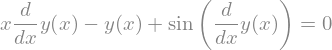

In [17]:
from sympy import *
x = symbols('x')
y = symbols('y', cls=Function)
y = y(x)

equat =  Eq(-y+x*y.diff(x)+smp.sin(y.diff(x)), 0)
equat
# dsolve(equat, y)

<h1> Finite differences </h1>

Calculate difference quotients $ \frac{f(x_{i+1})-f(x_i)}{x_{i+1} - x_i} $ -> derivative at midpoint $ \frac{x_{i+1} + x_i}{2} $

Interpolate the <b>first derivative</b> with these new nodes: $ \frac{x_{i+1} + x_i}{2} $ and values at them: $ \frac{f(x_{i+1})-f(x_i)}{x_{i+1} - x_i} $

In [18]:
# smp.differentiate_finite(x**3, x, points=[-1, 0, 2, 5])#.expand().collect(x)
smp.differentiate_finite(smp.sin(x), x, points=[-smp.pi/2, 0, smp.pi/2]).expand().collect(x)

Calculate value of <b>n-th derivative</b> at a point using finite diff approx

In [19]:
import numpy as np
x_list = [-np.pi/2, 0, np.pi/2]
smp.apply_finite_diff(1, x_list, np.sin(x_list), 0)

Calculates the <b>finite difference weights</b> for an arbitrarily spaced one-dimensional grid (x_list) for derivatives at $ x_0 $ of order $ 0, 1, …, $ up to order using a recursive formula.

This is like coefficients in Newton-Cotes quadratures.

Find general nterpolation formula on given nodes, then differenciate the interpolating polynomial

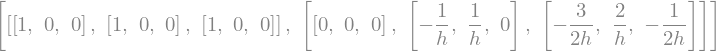

In [20]:
a, b, c, h = smp.symbols('a b c h')
x_list = [a, a+h, a+2*h]

smp.finite_diff_weights(1, x_list, a)

Function range

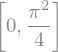

In [21]:
from sympy.calculus.util import function_range
function_range(x**2, x, Interval(0, smp.pi/2))

<h1>Coord system</h1>

Differential operators

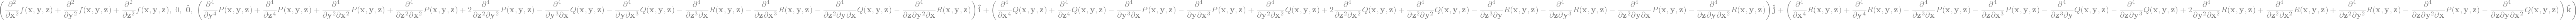

In [22]:
from sympy.vector import CoordSys3D, gradient, divergence, curl, dot
C = CoordSys3D('')

f = C.x * sin(C.x) * C.y**2
g = C.x
# type(C.x), type(C.j), type(x), type(f)

f_grad = gradient(f)
g_grad = gradient(g)

f, f_grad, g_grad
curl(f_grad), curl(g_grad) # del x (del*f) = 0

f, P, Q, R = smp.symbols('f P Q R', cls=smp.Function)
f = f(C.x, C.y, C.z)
F = P(C.x, C.y, C.z)*C.i + Q(C.x, C.y, C.z)*C.j + R(C.x, C.y, C.z)*C.k

laplace_op = divergence(gradient(f)) # Laplace operator
div_curl = divergence(curl(F)) # div(curl) = 0 scalar
curl_grad = curl(gradient(f)) # curl(grad) = 0 vector

laplace_op, div_curl, curl_grad, curl(curl(curl(curl(F))))

Directional derivative

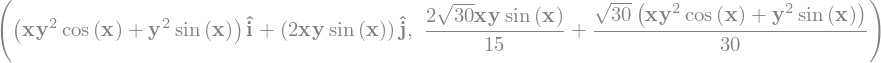

In [23]:
f = C.x*sin(C.x)*C.y**2
g = C.x
u = C.i*1 + C.j*2+ C.k*5
gradient(f), dot(u.normalize(), gradient(f))

LAMBDIFY VECTOR VALUED FUNCTION

In [24]:
f = x**2*C.i + y**2*C.j
f_lam = lambdify([x,y], f.to_matrix(C))
f_lam(2, 1)

array([[4],
       [1],
       [0]])

Logistic DE

Eq(y_0, A*exp(A*C1 + k*x_0)/(exp(A*C1 + k*x_0) - 1))


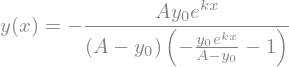

In [25]:
y = smp.symbols('y', cls=smp.Function)
x, k, A, x_0, y_0 = smp.symbols('x k A x_0 y_0')
y = y(x)

eq = y.diff(x) - k*y*(1-y/A)
soln = smp.dsolve(eq, y)

soln_subs = soln.subs({y:y_0, x:x_0})
print(soln_subs)
C1_value = smp.solve(soln_subs, smp.Symbol('C1'))[0]

soln = soln.subs(smp.Symbol('C1'), C1_value)
soln.subs('x_0', 0)

Free fall with air resistance

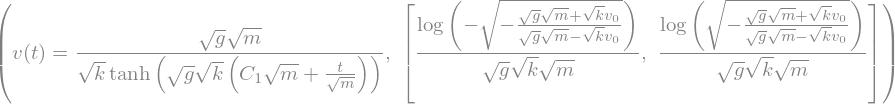

In [26]:
v = smp.symbols('v', cls=smp.Function)
t, m, k, g, v_0 = smp.symbols('t m k g v_0')
v = v(t)

eq = m*v.diff(t) - m*g + k*v**2
soln = dsolve(eq, v)
soln_subs = soln.subs({t:0, v:v_0})

C1_val = solve(soln_subs, smp.Symbol('C1'))
# soln = soln.subs(smp.Symbol('C1'), C1_val)
soln, C1_val